In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.model.dkdn import *
from src.model.instance_hardness import *
from src.model.support_subset import *
from sklearn.model_selection import train_test_split

np.random.seed(1234)

n = 100

mu1, mu2, sigma = 0, -2, 1

X1 = np.random.normal(mu1, sigma, size=[n, 2])
X2 = np.random.normal(mu2, sigma, size=[n, 2])
X3 = np.random.normal([-2, 2], 0.5, size=[n, 2])
X = np.vstack((X1, X2, X3))

y = np.hstack((np.zeros(int(len(X1))),np.ones(int(len(X2) + len(X3))))).astype(int)

In [3]:
dkdn_complexity = DkDN(k=3, n_jobs = -1)

In [4]:
dkdn_complexity.fit(X, y)

In [6]:
target = np.array([-1, 0.5])
support_neighbours, neighbours_list, radius, complexity = dkdn_complexity.predict(target, 0)

In [12]:
neighbours = X[support_neighbours]

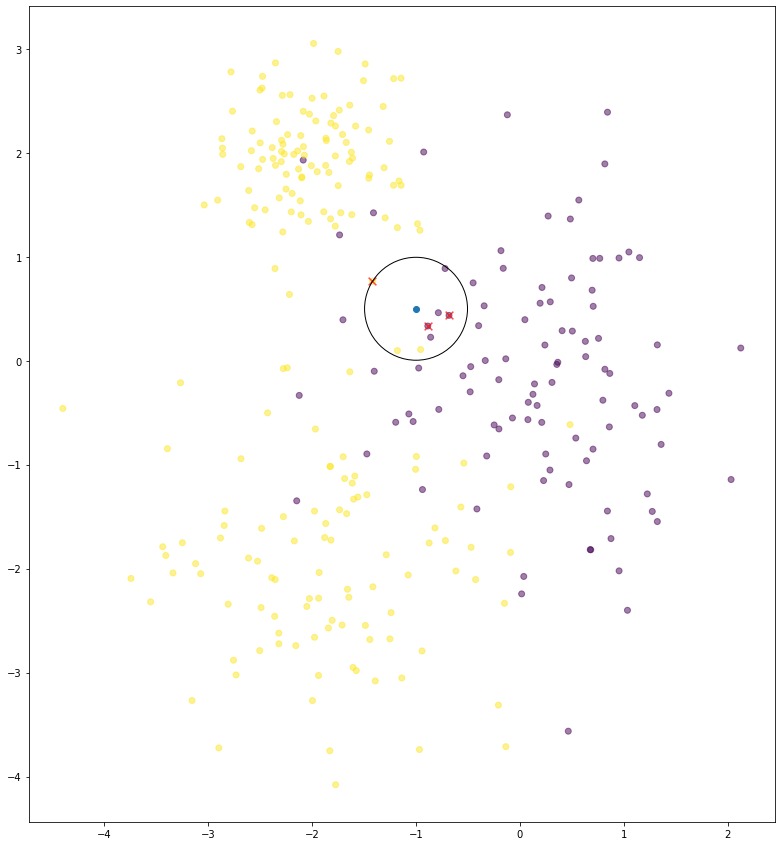

In [13]:
figure, axes = plt.subplots(figsize=[15, 15])

plt.scatter(X[:,0],X[:,1], c=y, alpha=0.5)

Drawing_uncolored_circle = plt.Circle( target,
                                      radius ,
                                      fill = False )
plt.scatter(target[0],target[1])
plt.scatter(neighbours[:, 0], neighbours[:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
axes.set_aspect( 1 )
axes.add_artist( Drawing_uncolored_circle )

plt.show()